In [61]:
# Import all kinds of libraries for AI

import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras as k
import os

In [62]:
# import data from data.csv

data = pd.read_csv('data.csv')

# do PCA to extract 2 dimensions

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

# adapt the data from data.csv to those new 2 dimensions

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# show

print(principalDf)

# calculate the std deviation of the 2 dimensions

print(principalDf.std())



      principal component 1  principal component 2
0                 -2.677311              -2.133574
1                 -1.143951               0.689630
2                  1.284372               0.153633
3                  0.797409              -0.966192
4                 -1.797624              -2.307619
...                     ...                    ...
1994              -1.883727               1.112758
1995              -2.448106              -1.180557
1996              -0.170244               0.705635
1997              -2.189779               1.358653
1998              -1.848169               0.784094

[1999 rows x 2 columns]
principal component 1    1.970085
principal component 2    0.998300
dtype: float64


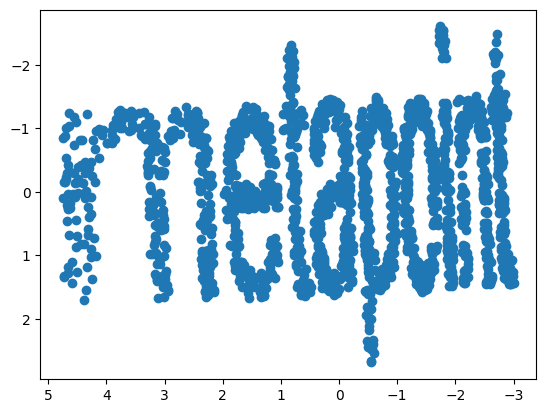

In [63]:
# plot the data from principalDF

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

# flip the data upside down

# plt.gca().invert_yaxis()

# do the data in the mirror

inv1 = plt.gca().invert_xaxis()

# invert inv1 yaxis

inv2 = plt.gca().invert_yaxis()

In [64]:
# import data from test_data.csv and train_data.csv

test_data = pd.read_csv('test_data.csv')
train_data = pd.read_csv('train_data.csv')

# visualize train_data in pd

print(train_data.head())
print(len(train_data))


# show lines where OUTPUT is NaN

print(len(train_data[train_data['OUTPUT'].isnull()]))

# drop lines where OUTPUT is NaN

train_data = train_data.dropna(subset=['OUTPUT'])

print(train_data[train_data['OUTPUT'].isnull()])

       MODE POWER   AMPS  VOLTS    TEMP UNIT  DELTA  GAMMA  OUTPUT
0  REDACTED  high  0.585  4.347  66.812    C -0.659 -0.527   3.749
1      beam   low  0.687  2.412 -17.044    C  0.508 -0.371  -1.062
2  REDACTED   low  0.888  2.979  40.918    C  0.600  1.412   2.265
3      auto   low  0.114  0.754 -43.308    C -0.760 -0.109   1.847
4     burst  high  0.318  3.955  37.752    C -0.751  0.492   1.821
1000
16
Empty DataFrame
Columns: [MODE, POWER, AMPS, VOLTS, TEMP, UNIT, DELTA, GAMMA, OUTPUT]
Index: []


In [65]:
# show train_data in pd

# print(train_data.describe())
# print(train_data.head())

# remove rows that contain NaN values for output

# show lines where AMPS is <0 or >1

print(len(train_data[train_data['AMPS']<0]))

# keep lines where AMPS is >0 and <1

train_data = train_data[train_data['AMPS']>=0]


13


In [66]:
print(train_data.describe())
# how many rows

print(len(train_data))

             AMPS       VOLTS        TEMP       DELTA       GAMMA      OUTPUT
count  971.000000  971.000000  971.000000  971.000000  971.000000  971.000000
mean     0.503784    2.010166   74.680664   -0.037600   -0.004225    0.156567
std      0.291678    1.406225  131.335616    0.560075    0.749576    2.511202
min      0.000000    0.020000 -100.000000   -1.000000   -2.000000   -8.323000
25%      0.254500    0.962500  -20.726000   -0.517500   -0.536000   -0.356000
50%      0.506000    1.730000   24.982000   -0.025000   -0.017000    0.211000
75%      0.760000    2.709500  211.253500    0.435500    0.516000    1.915000
max      0.999000    8.700000  373.150000    0.991000    2.000000    9.274000
971


In [67]:
train_data.head()
# print train_data where UNIT = "K"

print(train_data[train_data['UNIT'] == 'K'])

# save values where UNIT = K to a new pd

k_data = train_data[train_data['UNIT'] == 'K']

# transform TEMP to Celsius

k_data['TEMP'] = k_data['TEMP'] - 273.15

# print mean of TEMP

print(k_data['TEMP'].mean())
print(k_data['TEMP'].std())

# for all rows where UNIT = "K", change TEMP = TEMP - 273.15, and change UNIT = "C"

train_data.loc[train_data['UNIT'] == 'K', 'TEMP'] = train_data['TEMP'] - 273.15
train_data.loc[train_data['UNIT'] == 'K', 'UNIT'] = 'C'

         MODE POWER   AMPS  VOLTS     TEMP UNIT  DELTA  GAMMA  OUTPUT
11       beam  high  0.138  2.535  256.460    K -0.920  0.315  -0.168
12   REDACTED   low  0.778  0.996  284.293    K -0.007 -0.020   0.714
15       beam   low  0.983  5.072  372.587    K -0.756  1.430   7.409
17       beam  high  0.305  1.848  350.906    K -0.015  0.655   1.182
18   REDACTED   low  0.354  3.487  254.352    K  0.441 -0.758  -0.186
..        ...   ...    ...    ...      ...  ...    ...    ...     ...
983      beam  high  0.311  1.922  237.657    K  0.609  1.216  -0.071
986      auto   low  0.412  1.129  341.453    K -0.573  1.916   2.268
987      auto   low  0.763  2.267  354.482    K -0.350  0.427   2.277
991  REDACTED   low  0.116  1.784  293.955    K  0.528 -0.016   0.207
995      auto   low  0.350  4.257  274.581    K  0.991 -0.335   2.466

[221 rows x 9 columns]
-0.6903755656108361
47.71908880263499


/tmp/ipykernel_1259/3378776317.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_data['TEMP'] = k_data['TEMP'] - 273.15


In [68]:
# print train_data

# print min and max where UNIT = "C"

print(train_data[train_data['UNIT'] == 'C'].min())
print(train_data[train_data['UNIT'] == 'C'].max())

# where UNIT = "?", rows that are > 100 get TEMP = TEMP - 273.15

train_data.loc[(train_data['UNIT'] == '?') & (train_data['TEMP'] > 100), 'TEMP'] = train_data['TEMP'] - 273.15

# where UNIT = "?", rows that are > 100 get transformed to C

train_data.loc[(train_data['UNIT'] == '?'), 'UNIT'] = 'C'


MODE      REDACTED
POWER         high
AMPS           0.0
VOLTS         0.02
TEMP        -100.0
UNIT             C
DELTA         -1.0
GAMMA         -2.0
OUTPUT      -8.154
dtype: object
MODE      burst
POWER       low
AMPS      0.999
VOLTS       8.7
TEMP      100.0
UNIT          C
DELTA     0.991
GAMMA       2.0
OUTPUT    9.274
dtype: object


In [105]:
print(train_data)

# Create dense neural network that predicts OUTPUT
# it takes as inputs: POWER, AMPS, VOLTS, TEMP, DELTA, GAMMA

# import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

         MODE POWER   AMPS  VOLTS    TEMP UNIT  DELTA  GAMMA  OUTPUT
0    REDACTED  high  0.585  4.347  66.812    C -0.659 -0.527   3.749
1        beam   low  0.687  2.412 -17.044    C  0.508 -0.371  -1.062
2    REDACTED   low  0.888  2.979  40.918    C  0.600  1.412   2.265
3        auto   low  0.114  0.754 -43.308    C -0.760 -0.109   1.847
4       burst  high  0.318  3.955  37.752    C -0.751  0.492   1.821
..        ...   ...    ...    ...     ...  ...    ...    ...     ...
995      auto   low  0.350  4.257   1.431    C  0.991 -0.335   2.466
996      beam   low  0.644  1.128 -27.707    C -0.529  0.034  -1.834
997     burst   low  0.887  1.418 -71.590    C  0.729 -0.503  -0.188
998  REDACTED   low  0.323  0.291 -17.162    C -0.120  0.524   0.081
999      beam  high  0.344  2.538 -32.986    C  0.075  0.840  -0.379

[971 rows x 9 columns]


In [130]:
# create model

model = Sequential()

# add layers

model.add(Dense(30, input_dim=7, activation='relu'))

model.add(Dense(20, activation='relu'))


model.add(Dense(30, activation='relu'))

model.add(Dense(10, activation= 'relu'))
model.add(Dense(1, activation='linear'))

# compile model

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


In [114]:
# create another pd, but where POWER is 'low' put 0 and where POWER is 'high' put 1
# copy train_data to train_data2

train = train_data.copy()
train['POWER'] = train_data['POWER'].replace('low', 0.0)
train['POWER'] = train['POWER'].replace('high', 1.0)

# replace MODE with 0, 1, 2, 3

train['MODE'] = train['MODE'].replace('auto', 0.0)
train['MODE'] = train['MODE'].replace('beam', 1.0)
train['MODE'] = train['MODE'].replace('burst', 2.0)
train['MODE'] = train['MODE'].replace('REDACTED', 3.0)


# Normalize dataset AMPS, VOLTS 

# train['AMPS'] = (train['AMPS'] - train['AMPS'].mean()) / train['AMPS'].std()
# train['VOLTS'] = (train['VOLTS'] - train['VOLTS'].mean()) / train['VOLTS'].std()
# train['TEMP'] = (train['TEMP'] - train['TEMP'].mean()) / train['TEMP'].std()
# train['DELTA'] = (train['DELTA'] - train['DELTA'].mean()) / train['DELTA'].std()
# train['GAMMA'] = (train['GAMMA'] - train['GAMMA'].mean()) / train['GAMMA'].std()




In [132]:
# train on train_data

# select columns from train_data

trainX = train[['MODE','POWER', 'AMPS', 'VOLTS', 'TEMP', 'DELTA', 'GAMMA']].values
trainY = train['OUTPUT'].values

# split trainX and trainY into train and test

from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.5, random_state=42)

# print(trainX)

# fit

model.fit(trainX, trainY, epochs=1000, batch_size=1000)

# evaluate model based on testX and testY; give me mean squared error

scores = model.evaluate(testX, testY)

print(scores)


Epoch 1/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 10/1000
1/1 [=======

In [93]:
# process test_data in the same way

test = test_data.copy()

test['POWER'] = test_data['POWER'].replace('low', 0.0)
test['POWER'] = test['POWER'].replace('high', 1.0)

test['MODE'] = test['MODE'].replace('auto', 0.0)
test['MODE'] = test['MODE'].replace('beam', 1.0)
test['MODE'] = test['MODE'].replace('burst', 2.0)
test['MODE'] = test['MODE'].replace('REDACTED', 3.0)


In [110]:
# now predict on the test data

testX = test[['MODE','POWER', 'AMPS', 'VOLTS', 'TEMP', 'DELTA', 'GAMMA']].values

predictions = model.predict(testX)

# put only predictions in the results.csv file

np.savetxt('results.csv', predictions, delimiter=',')

79/79 [==============================] - 0s 2ms/step


In [75]:
# import opencv

import cv2

In [76]:
# normalize the data from predictions to 0-255

predictions = cv2.normalize(predictions, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


print(predictions)




[[118]
 [145]
 [141]
 ...
 [147]
 [143]
 [147]]


In [77]:
# create a 50x50 image with 1 channel

img = np.zeros((50,50,1), np.uint8)

# put predictions values in the image

for i in range(0,50):
    for j in range(0,50):
        img[i,j] = predictions[i*50 + j]




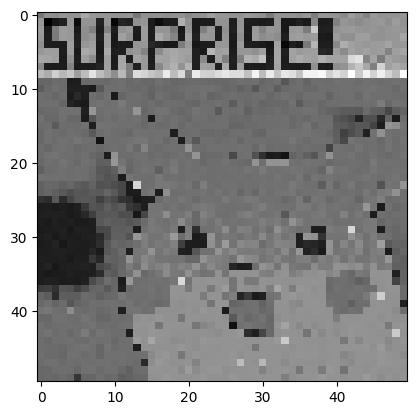

In [78]:
# use plt to plot the image

plt.imshow(img, cmap='gray')